In [4]:
using Plots
using DifferentialEquations

Poisson with M, E and J as functions of x

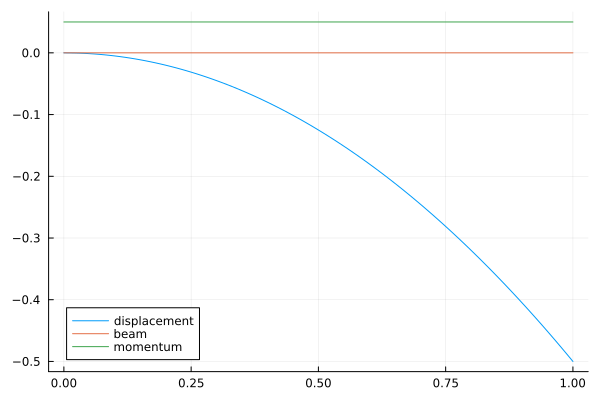

In [5]:
E(x)=1                 #young module equation
J(x)= 1                      #inertia equation
M(x)=-1;                  #momentum equation


f(x)=-M(x)/(E(x)*J(x))


function poisson!(du,u,p,x)
    du[1]=u[2]
    du[2]=f(x)
end


function bc!(r,u,p,x)
    r[1]= u[1][1]
    r[2]= u[1][2]
end


xspan=(0.0 , 1.0)

bvp= BVProblem(poisson!,bc!,[0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)

plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,-0.05*M.(u_sol.t),label="momentum")

beam equation with E and J constant and q as a function of x

between two joints

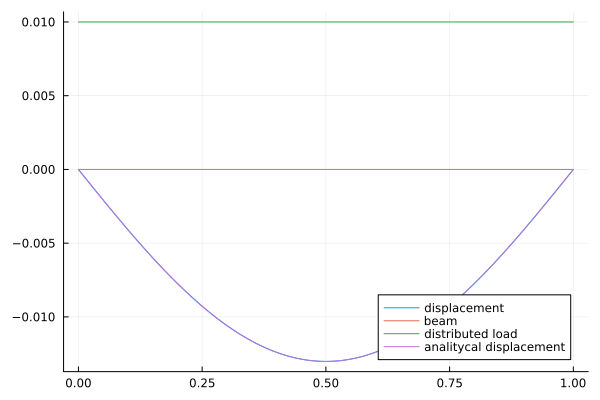

In [6]:
q(x)=1
EJ=1

f(x)=q(x)/EJ


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[end][1]
    residual[3]= u[1][3] 
    residual[4]= u[end][3] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")

fex(x)=(x^4/24 -x^3/12 +x/24)*f(x)
plot!(u_sol.t,-fex.(u_sol.t),label="analitycal displacement")

case with fixed joint in one end

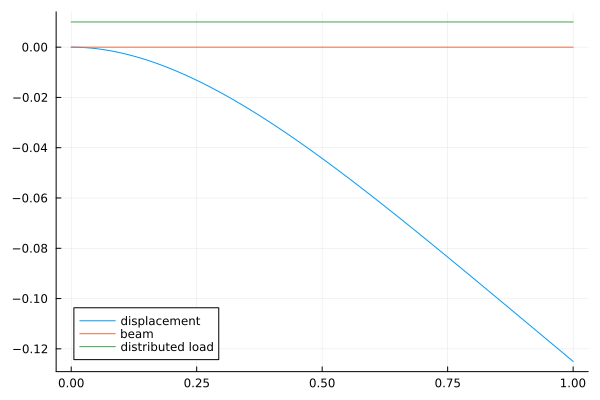

In [8]:
q(x)=1
EJ=1

f(x)=q(x)/EJ


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[end][3]
    residual[3]= u[1][2] 
    residual[4]= u[end][4] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")

between fixed constrain and joint 

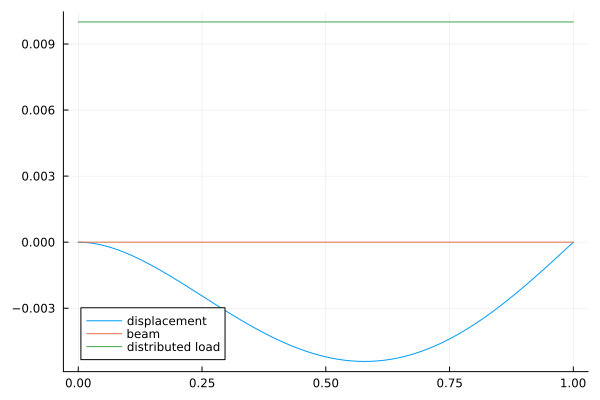

In [9]:
q(x)=1
EJ=1

f(x)=q(x)/EJ


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][1] 
    residual[4]= u[end][3] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")

between fixed costrain and pattino

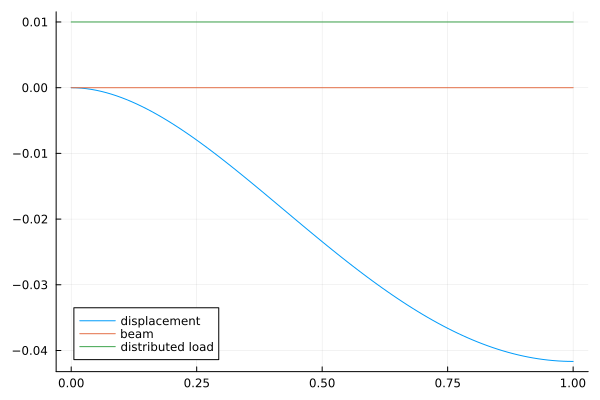

In [10]:
q(x)=1
EJ=1

f(x)=q(x)/EJ


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][2] 
    residual[4]= u[end][4] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")